# Random Walks Project - Mathew Cao

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
from scipy.optimize import curve_fit

<div class="alert alert-block alert-info">
Any cells that take longer than 5 seconds in its current state are noted (Done on my fast computer). Time taken for plot used for the report are also recorded in the report.
</div>

## Sections:
* [Random Walk on a Square Lattice](#1)
* [Random Walk on a Triangular Lattice](#2)
* [Random Walk on a Cliff](#3)
* [Self Avoiding Walk](#4)
* [Self Contained Random Walk - Square](#5)
* [Self Contained Random Walk - Circle](#6)
* [Random Walk around RANDOM WALK](#7)

<a id="1"></a>
    
# Random Walk on a Square Lattice

In [2]:
%%time

########################
length = 10**6 # <<<< Change this value to vary the amount of steps taken
########################

starting_pos = np.array(([0,0])) # The starting position (0,0)

allowed_moves = np.array(([1,0],[0,1],[-1,0],[0,-1])) # The allowed moves for each random step

steps = allowed_moves[np.random.randint(0,4,length)] 
# Creates a (length,1) array of random numbers 0 up to 3 and indexes each in allowed_moves, creating a 
# (length,2) array of random moves

path = np.cumsum(steps,axis=0) # Creates the 'path' by adding all the previous steps up to that point 
path = np.vstack((starting_pos,path)) 

# Adds the starting position (0,0) onto the rest of the path 
# to create a (length + 1,2) array i.e. length steps 

CPU times: user 89.5 ms, sys: 52.9 ms, total: 142 ms
Wall time: 169 ms


Average Time =  25.1 ms ± 40.5 µs per loop

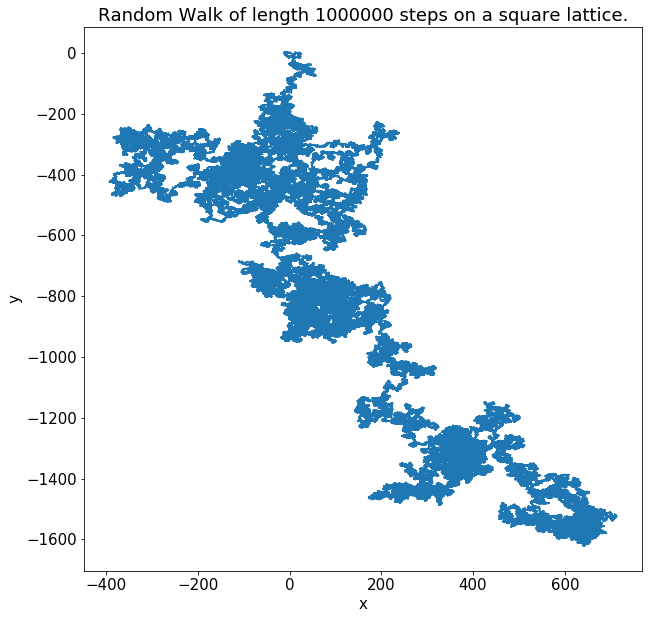

CPU times: user 2.45 s, sys: 230 ms, total: 2.68 s
Wall time: 3.01 s


In [3]:
%%time

# Just plotting stuff
fig = plt.figure(figsize=(10,10))
# Increase figsize to 100 or 400 for more detail

plt.rc('font', size=15)
plt.plot(path[:,0],path[:,1])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Walk of length "+str(length)+ " steps on a square lattice.")

#plt.savefig("Random Walk "+str(length)+".png")
plt.show()

## Variance of Distance n steps away

In [4]:
def dist_from_step_var(index,array):
    # Calculates the variance of distances at a given step 'index' from an array 'array'

    index = int(index)
    length = len(array)
    
    dist_roll_array_not_back = array[index:] - array[:length-index] 
    # Rolls the array so that the distances at a certain step length can be calculated
    # Much faster than np.roll since it incoporates the removal of distances already calculated in one go
    
    distance = np.sqrt(np.sum(np.square(dist_roll_array_not_back),axis = 1))
    # Calculates the distance between the points 
    
    var = np.var(distance)
    # Calculates the variance of distance at the given step length
    
    return var  

<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 30 secs
</div>

In [5]:
%%time

# Using np.apply_along_axis instead of a for loop since it's faster 

index_array = np.reshape(np.arange(0,int(np.sqrt(length))),(int(np.sqrt(length)),1))
# Acts as an iterator - a (1,length) array

variance = np.apply_along_axis(dist_from_step_var, 1, index_array, path)
# Variance at each step length from 0 to lenght steps

CPU times: user 1min 37s, sys: 14.7 s, total: 1min 51s
Wall time: 57.5 s


### Linear Fitting of Variance

In [6]:
grad,inter = np.polyfit(np.arange(1,len(variance)+1,1), variance,1)

In [7]:
grad # Gradient

0.21841529426896145

In [8]:
inter # Intercept

-1.3254419937860638

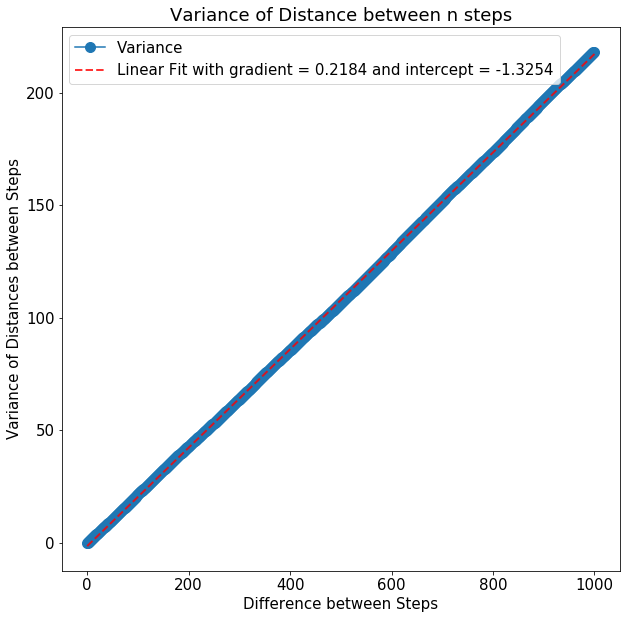

In [9]:
# Just Plotting stuff
fig = plt.figure(figsize=(10,10))

plt.rc('font', size=15) 

plt.xlabel("Difference between Steps")
plt.ylabel("Variance of Distances between Steps")
plt.title("Variance of Distance between n steps")

# For plotting the linear fit
x = np.linspace(0,int(np.sqrt(length)),5)
fit_line = grad * x + inter

plt.plot(np.arange(0,int(np.sqrt(length))),variance,marker ='o',markersize=10,label='Variance')
plt.plot(x,fit_line,alpha=0.8,color='red',linestyle='dashed',linewidth=2,label='Linear Fit with gradient = '+ str(np.round(grad,4))+' and intercept = '+ str(np.round(inter,4)))

plt.legend()
#plt.savefig("Random Walk Variance "+str(length)+".png")
plt.show()

## Distribution of distances at a chosen n steps apart

In [10]:
%%time

########################
Chosen_Step = 200 # <<<< Change this value to vary the distances at n steps apart
########################

def dist_from_step_Dist(index,array):
    # Calculates the distances between all the points on the path at a given step length
    # Similar to dist_from_step_var but doesn't calculate variance
    
    index = int(index)
    length = len(array)
    
    dist_roll_array_not_back = array[index:] - array[:length-index]
    
    distance = np.sqrt(np.sum(np.square(dist_roll_array_not_back),axis = 1))
    
    return distance  


Chosen_Dist_for_Hist = dist_from_step_Dist(Chosen_Step, path)

CPU times: user 43.9 ms, sys: 12.6 ms, total: 56.5 ms
Wall time: 53.5 ms


In [11]:
########################
Bin_max = 50 # <<<< Largest distacnce Bin in Hist
Number_of_Bins = 20 # <<<< Amount of Bins in Hist
########################


Bins_range = np.linspace(0,Bin_max,Number_of_Bins) # Bins for Histogram 

loc, scale1 = rayleigh.fit(Chosen_Dist_for_Hist) # Rayleigh fit of data

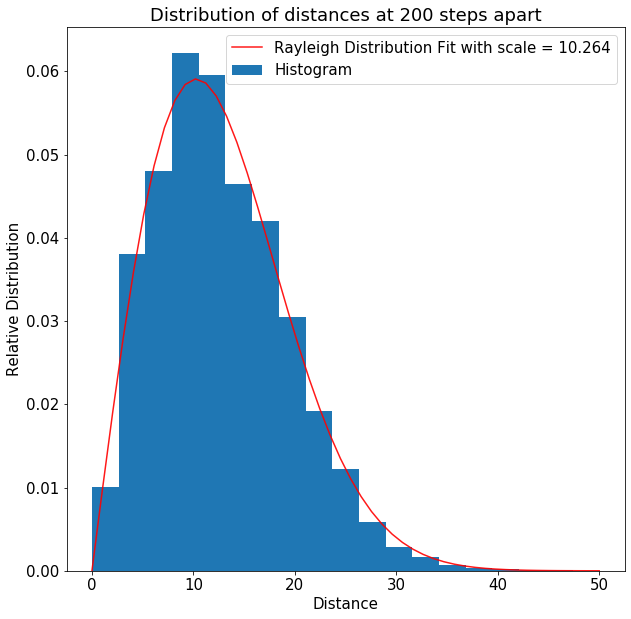

In [12]:
# Just Plotting stuff

fig = plt.figure(figsize=(10,10))
plt.rc('font', size=15) 

# For plotting the linear fit
x = np.linspace(0,Bin_max,Bin_max)

plt.plot(x, rayleigh.pdf(x,scale = scale1), 'r-', alpha=0.9,label='Rayleigh Distribution Fit with scale = ' + str(np.round(scale1,3)))


plt.hist(Chosen_Dist_for_Hist,bins = Bins_range,density = True,label='Histogram')

plt.xlabel("Distance")
plt.ylabel("Relative Distribution")
plt.title("Distribution of distances at "+str(Chosen_Step) +" steps apart")

plt.legend()
#plt.savefig("Distribution of distances at "+str(Chosen_Step) +" steps apart.png")
plt.show()

In [13]:
scale1 # Scale of rayleigh fit = standard dev.

10.264422129036923

In [14]:
np.sqrt(Chosen_Step/2) # Theoretical standard dev.

10.0

### How standard deviation scales with n using Rayleigh fitting parameter (to check that the variance is linear)

<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 4 mins
</div>

In [15]:
%%time
# Repeats the code for the "Distribution of distances at a chosen n steps apart" section for mutiple steps to try to
# see how the scale of the fit scales with n

Chosen_Step_Gap = np.linspace(1,1000,51,dtype=int) # Array of step lengths to calculate
scale_list = []

for i in Chosen_Step_Gap:
    Chosen_Dist_for_Hist = dist_from_step_Dist(i, path)

    loc, scale1 = rayleigh.fit(Chosen_Dist_for_Hist)
    
    scale_list.append(scale1)

CPU times: user 7min 49s, sys: 55.6 s, total: 8min 45s
Wall time: 4min 24s


(array([0.72296037]), array([[4.51298859e-07]]))


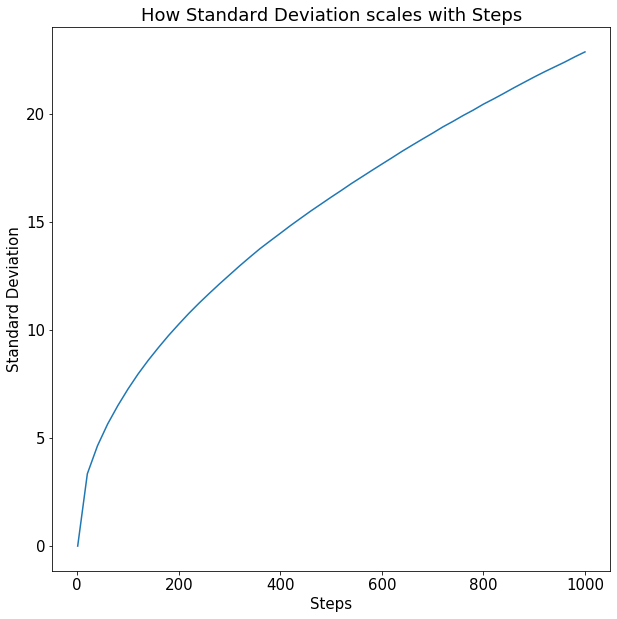

In [16]:
# Just plotting stuff
fig = plt.figure(figsize=(10,10))
plt.rc('font', size=15) 

plt.xlabel("Steps")
plt.ylabel("Standard Deviation")
plt.title("How Standard Deviation scales with Steps")


def rootxfit(x,a):
    return  a*x**(0.5)

curve_fit1 = curve_fit(rootxfit, Chosen_Step_Gap, scale_list)
# Fits the data to root(steps) specified 
print(curve_fit1)

plt.plot(Chosen_Step_Gap,scale_list)
#plt.savefig("StandarDev.png")
plt.show()

Demonstrates the relationship between the linear variance gradient and the Rayleigh distribution of distances since the standard deviation scales with $\sqrt n$ for n steps with a very small error.

In [17]:
curve_fit1[1]# error on fit

array([[4.51298859e-07]])

### Relationship with variance

In [18]:
# fitting a straight line
def xfit(x,a,b):
    return  a*x + b

curve_fit1 = curve_fit(xfit, Chosen_Step_Gap, np.square(scale_list))
print(curve_fit1)

(array([0.52147669, 0.60880637]), array([[ 9.29899943e-08, -4.64968478e-05],
       [-4.64968478e-05,  3.13066639e-02]]))


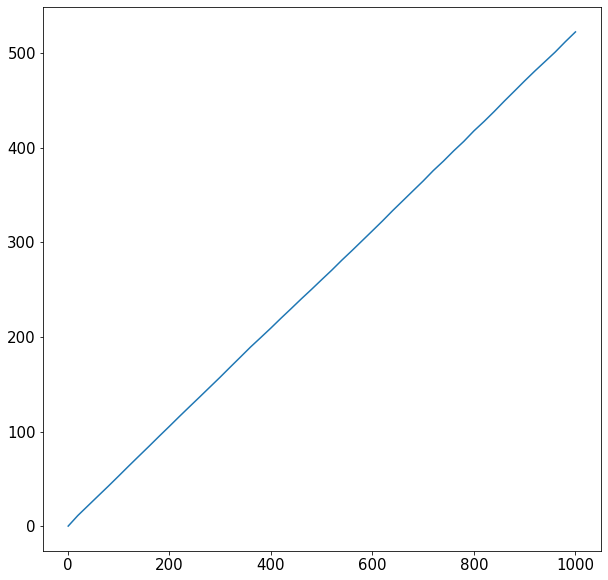

In [19]:
fig = plt.figure(figsize=(10,10))
plt.plot(Chosen_Step_Gap,np.square(scale_list)) # variance against steps
#plt.savefig("variance.png")
plt.show()

<a id="2"></a>
# Random Walk on a Triangular Lattice

In [20]:
%%time
# Same code as for the Square Lattice but with different allowed steps

########################
length_tri = length # <<<< Change this value to vary the amount of steps taken
########################

one = np.array(([0,0]))

allowed_moves_tri = np.array(([1,0],[-1,0],[0.5,np.sqrt(3/4)],[-0.5,np.sqrt(3/4)],[-0.5,-np.sqrt(3/4)],[0.5,-np.sqrt(3/4)]))
# Now six steps allowed 

steps = allowed_moves_tri[np.random.randint(0,6,length_tri)]

path_tri = np.cumsum(steps,axis=0)
path_tri = np.vstack((one,path_tri))

CPU times: user 87.1 ms, sys: 31.8 ms, total: 119 ms
Wall time: 110 ms


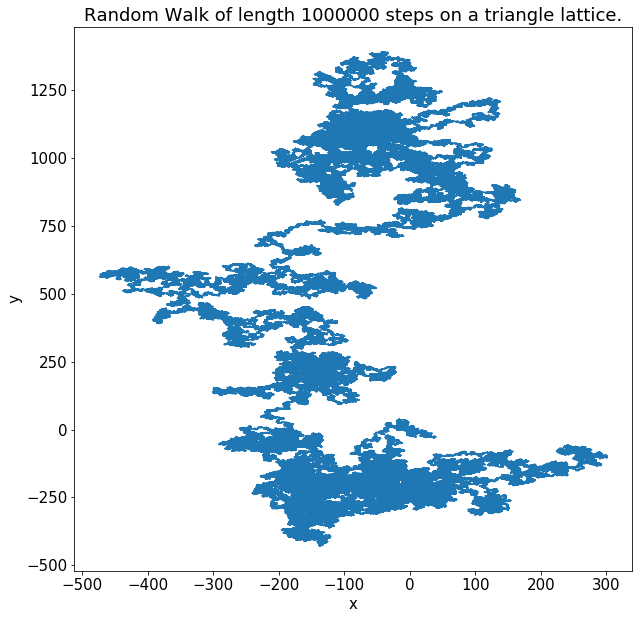

In [21]:
# Just plotting stuff - same as for square lattice
fig = plt.figure(figsize=(10,10))
plt.rc('font', size=15) 

plt.plot(path_tri[:,0],path_tri[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Walk of length "+str(length_tri)+ " steps on a triangle lattice.")
#plt.savefig("Triangular Lattice Large"+str(length_tri) +".png")
plt.show()

### Linear Fitting of Variance

<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 30 secs
</div>

In [22]:
%%time
# Same as for square lattice 
index_array_tri = np.reshape(np.arange(0,int(np.sqrt(length_tri))),(int(np.sqrt(length_tri)),1))

variance_tri = np.apply_along_axis(dist_from_step_var, 1, index_array_tri, path_tri)

CPU times: user 1min 31s, sys: 13.9 s, total: 1min 45s
Wall time: 53.4 s


In [23]:
grad_tri,inter_tri = np.polyfit(np.arange(1,len(variance_tri)+1,1), variance_tri,1)

In [24]:
grad_tri # Triangular Lattice Variance Gradient 

0.21386552179999824

In [25]:
grad # compared to square lattice gradient

0.21841529426896145

In [26]:
inter_tri # Triangular Lattice Variance Intercept 

-1.2217906165354064

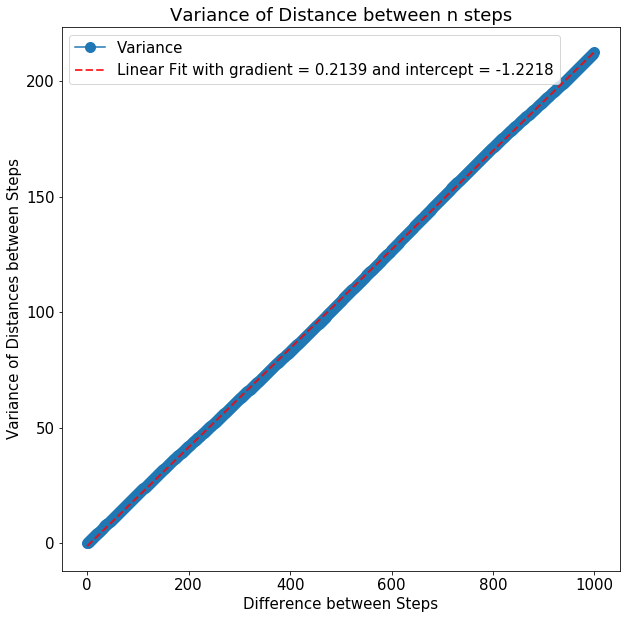

In [27]:
# Just plotting stuff
fig = plt.figure(figsize=(10,10))

plt.rc('font', size=15) 
plt.xlabel("Difference between Steps")
plt.ylabel("Variance of Distances between Steps")
plt.title("Variance of Distance between n steps")

# For plotting fit
x = np.linspace(0,int(np.sqrt(length_tri)),5)
fit_line_tri = grad_tri * x + inter_tri

plt.plot(variance_tri,marker ='o',markersize=10,label='Variance')
plt.plot(x,fit_line_tri,alpha=0.8,color='red',linestyle='dashed',
     linewidth=2,label='Linear Fit with gradient = '+ str(np.round(grad_tri,4))+' and intercept = '+ str(np.round(inter_tri,4)))



plt.legend()
#plt.savefig("Triangular Variance "+str(length)+".png")
plt.show()

## Distribution of distances at a chosen n steps apart

In [28]:
# Same as for square lattice
Chosen_Step_tri = 200
Chosen_Dist_for_Hist = dist_from_step_Dist(Chosen_Step_tri, path_tri)

In [29]:
# Same as for square lattice
########################
Bin_max = 50 # <<<< Largest distacnce Bin in Hist
Number_of_Bins = 20 # <<<< Amount of Bins in Hist
########################


Bins_range = np.linspace(0,Bin_max,Number_of_Bins) # Bins for Histogram 

loc, scale1 = rayleigh.fit(Chosen_Dist_for_Hist)

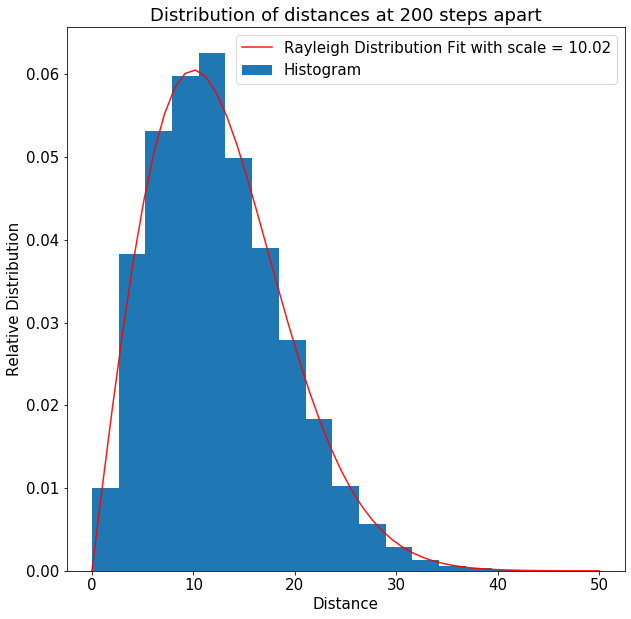

In [30]:
fig = plt.figure(figsize=(10,10))
plt.rc('font', size=15) 

# For plotting the fit
x = np.linspace(0,Bin_max,Bin_max)
plt.plot(x, rayleigh.pdf(x,scale = scale1), 'r-', alpha=0.9,label='Rayleigh Distribution Fit with scale = ' + str(np.round(scale1,3)))

plt.hist(Chosen_Dist_for_Hist,bins = Bins_range,density = True,label='Histogram')

plt.xlabel("Distance")
plt.ylabel("Relative Distribution")
plt.title("Distribution of distances at "+str(Chosen_Step) +" steps apart")
plt.legend()

#plt.savefig("Tri Distribution of distances at "+str(Chosen_Step) +" steps apart.png")
plt.show()

In [31]:
scale1

10.020442549912499

<a id = "3"></a>
# Cliff

<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 4 mins 30 secs 
</div>

In [32]:
%%time

########################
cliff_x = 20 # <<<< Change the x value of the cliff
times = 1000 # <<<< Change the amount of times the walk is done per step length 
min_step_length = cliff_x # <<<< Change the min number of steps considered 
max_step_length = 10000 # <<<< Change the maximum number of steps taken
########################

def walk(length):
    # Turns the code for generating random walks into a function so that it can be called multiple times
    one = np.array(([0,0]))

    allowed_moves = np.array(([1,0],[0,1],[-1,0],[0,-1]))
    
    steps = allowed_moves[np.random.randint(0,4,length)]

    path = np.cumsum(steps,axis=0)
    path = np.vstack((one,path))
    return path

def check_if_fall():
    # Checks if the path contains x values equal to where the cliff is - i.e if it goes over the cliff 
    
    Fall_off_cliff_Bool = np.sum([cliff_x < walk(steps)[:,0]]) > 0
    
    # 1) [cliff_x == walk(steps)[:,0]] creates a Boolean list of when the path x value == the cliff x value
    # 2) np.sum() adds up all the True values (since True = 1 and False = 0)
    # 3) if the sum is higher than 0 (i.e. has gone over the cliff at least once), True is returned
    
    return Fall_off_cliff_Bool

walk_length = np.arange(min_step_length,max_step_length,20)
prob_list = []


for steps in walk_length:
    amount_of_falls = np.sum([check_if_fall() for i in range(times)]) 
    # Adds up the amount of cliff falls at a given step length over the amount of walks is 
    # done per step length specified
    
    prob = amount_of_falls/times 
    # Finds fraction of times the walk has gone over the cliff
    
    prob_list.append(prob)

CPU times: user 3min 10s, sys: 2.31 s, total: 3min 12s
Wall time: 3min 12s


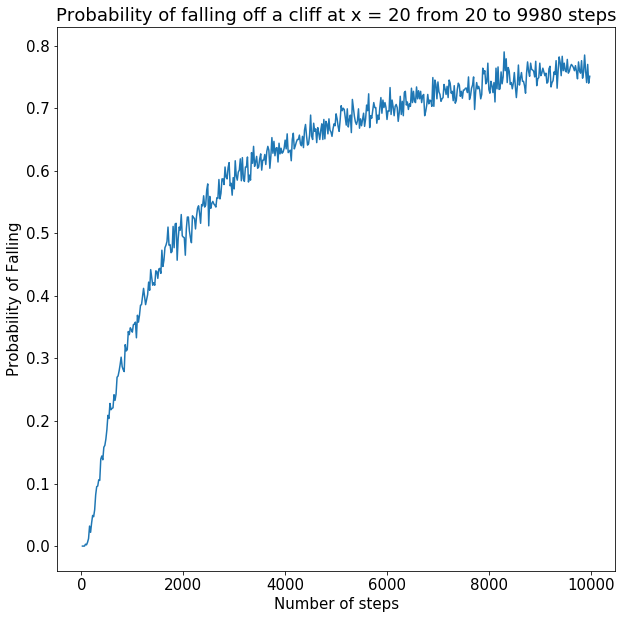

In [33]:
# Just plotting stuff

fig = plt.figure(figsize=(10,10))  
plt.rc('font', size=15) 
plt.plot(walk_length,prob_list)

plt.title("Probability of falling off a cliff at x = "+ str(cliff_x) + " from "+ str(walk_length[0]) + ' to ' + str(walk_length[-1]) + ' steps')   
plt.xlabel("Number of steps")
plt.ylabel("Probability of Falling")

#plt.savefig('cliff.png')
plt.show()

For Debugging: -Fist the last zero prob. step length

In [34]:
non_zero_values = np.array(prob_list).nonzero() 
# Indexes all the nonsero values

last_zero_before_non_zero = non_zero_values[0][0] -1
# The first nonzero value - 1 is the last zero

last_walk_that_didnt_touch = walk_length[last_zero_before_non_zero]
# Finds the number of steps at the last zero

print (str(last_walk_that_didnt_touch) + ' steps - Longest walk not to fall off')

60 steps - Longest walk not to fall off


<a id ="4"></a>
# Self Avoiding Walk (SAW)

In [35]:
%%time

########################
length_avoid = 1000 # <<<< Change the maximum length the SAW can be (likely to be shorter)
########################

marker = np.zeros((11,11)) 
# marker array to log all the places the walker has been
size = 11
# Starting size of array is (11 x 11) 
# A small starting array is prefered since it takes less time to process

currentx = 0
currenty = 0
# current x,y value of walker

pathx = [0]
pathy=[0]
# Lists of path x,y values

def carttomark(x,y):
    # Swaps between cartesian coordinates to matrix indexes
    x = x + int(size/2)
    y = int(size/2) - y
    
    return x,y

def tocart(xmat,ymat):
    # Swaps between matrix indexes to cartesian coordinates
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    # Creates a distance array of the distance from current position to all other positions in the matrix
    x,y = tocart(x,y)
    
    return (x-currentx)**2 + (y-currenty)**2

def take_step():
    # Finds all the available steps the walker can take next 
    
    gradientmap = np.fromfunction(togetthere,shape=(size,size))
    # Calculates the distances from the walker's current position to all the other positions in the array
    
    gradientmap += marker
    # Adds the array which keeps track of where the walker has already been
    # This exploits the next line of code which finds finds where the distance is 1 as if the marker > 1, it will not
    # register as a valid spot to go to even if it would be normally

    choices = np.where(gradientmap == 1)
    # Finds the places in the array that are a distance of one away from the walker's current position
    # i.e. Up, Down, Left, and Right 
    
    choicesx, choicesy = tocart(choices[1],choices[0]) 
    # Changes the array indexes to cartesian coordinates so that they can be used to make the path 
    
    return choicesx, choicesy
    

while length_avoid > 0: 
    
    x_candidates, y_candidates = take_step()
    # Gets a list of the available positions the walker can go to
    
    if len(x_candidates) == 0:
        # If there are no places to go, the walker is stuck so the walk is ended
        break
                    
    random_step = np.random.randint(0,len(x_candidates))
    # Chooses a random position to go to out of the avaialable positions
    
    currentx = x_candidates[random_step] 
    currenty = y_candidates[random_step]
    # Indexes the random number to get the random position
    
    pathx.append(currentx)
    pathy.append(currenty)
    # Adds the step to the path
    
    M_x, M_y = carttomark(currentx,currenty)
    # Finds the x,y position in matrix indices to that the position can be added to the marker
    
    marker[M_y][M_x] = 100
    # Updates the marker to register that the walker has been there
    
    if currentx + 5 > int(size/2) or currenty + 5 > int(size/2):
        # Increases the size of the marker and the size of the matrix needed to evalute distance if the walker is 
        # near the edge of the matrix
        
        size += 20
        marker = np.pad(marker,10,'edge')
        # Each time, the array is increased by 10 in all directions 
        
    length_avoid -= 1
    # Makes sure the step is counted

CPU times: user 26.2 ms, sys: 4.18 ms, total: 30.4 ms
Wall time: 27.1 ms


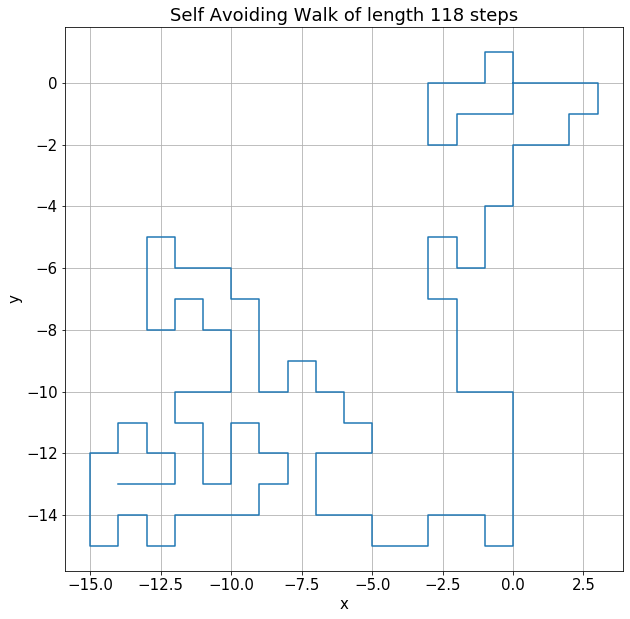

In [36]:
fig = plt.figure(figsize=(10,10))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Self Avoiding Walk of length "+str(len(pathx))+ " steps")
plt.plot(pathx,pathy)
plt.grid()
#plt.savefig("Avoid.png")
plt.show()

## With Backtrack

In [37]:
%%time

########################
length_avoid = 10**3 # <<<< Change the maximum length the SAW can be 
                    # (it will be much closer to this number than the SAW but still not exact)
########################

# Most things are the same as above for SAW

length_avoid_for_title = length_avoid
marker = np.zeros((11,11))
size = 11

currentx = 0
currenty = 0


pathx = [0]
pathy=[0]

def carttomark(x,y):
    x = x + int(size/2)
    y = int(size/2) - y
    
    return x,y

def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)
    
    return (x-currentx)**2 + (y-currenty)**2

def take_step():
    
    gradientmap = np.fromfunction(togetthere,shape=(size,size))
    
    gradientmap += marker
    
    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    return choicesx, choicesy
    

while np.size(pathx) < length_avoid: 
    
    x_candidates, y_candidates = take_step()

    if len(x_candidates) == 0:
        # Backtrack if there are no available steps to go to 
        
        pathx = pathx[:-1]
        pathy = pathy[:-1]
        # Removes the previous step from the path
        
        currentx = pathx[-1]
        currenty = pathy[-1]
        # Defines that the current position as the last time another step was available
        
        if len(x_candidates) == 0:
            # if there are still no steps, repeat the above process
            continue
                    
    random_step = np.random.randint(0,len(x_candidates))
        
    currentx = x_candidates[random_step] 
    currenty = y_candidates[random_step]
    
    pathx.append(currentx)
    pathy.append(currenty)
    
    M_x, M_y = carttomark(currentx,currenty)
    
    marker[M_y][M_x] = 10
    
    if currentx + 2 > int(size/2) or currenty + 2 > int(size/2):
        size += 4
        marker = np.pad(marker,2,'edge')
        
        
path_avoid = np.transpose([pathx,pathy])

CPU times: user 858 ms, sys: 10.9 ms, total: 869 ms
Wall time: 879 ms


## Trying to increase the efficiency of program

Not that relevant to show the progression but I did wate 6 hours trying to shave off a few miliseconds

In [38]:
%%timeit

def carttomark(x,y):
    x = x + int(size/2)
    y = int(size/2) - y
    
    return x,y

def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)
    
    return (x-currentx)**2 + (y-currenty)**2

def take_step(additional_matrix):
    
    gradientmap = np.fromfunction(togetthere,shape=(size,size))
    gradientmap += additional_matrix

    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    return choicesx, choicesy
    
def main2():
    
    global currentx
    global currenty
    global size
    
    length_avoid = 1000
    marker = np.zeros((11,11))
    size = 11

    currentx = 0
    currenty = 0

    pathx = [0]
    pathy=[0]

    while np.size(pathx) < length_avoid:
        
        x_candidates, y_candidates = take_step(marker)

        if len(x_candidates) == 0:
            
            pathx = pathx[:-1]
            pathy = pathy[:-1]

            currentx = pathx[-1]
            currenty = pathy[-1]
        
            if len(x_candidates) == 0:
                continue
                    
        random_step = np.random.randint(0,len(x_candidates))
        
        currentx = x_candidates[random_step] 
        currenty = y_candidates[random_step]
        
        pathx.append(currentx)
        pathy.append(currenty)
    
        M_x, M_y = carttomark(currentx,currenty)
    
        marker[M_y][M_x] = 100
        
        # Changed the conditions to when the marker array size is changed so that it is a small as possible at all
        # times - reduces amount of places that need to be operated on
        
        if currentx + 2 > int(size/2) or currenty + 2 > int(size/2):
            size += 4
            marker = np.pad(marker,2,'edge')
        
    path = np.transpose([pathx,pathy])
    
    return path

main2()

641 ms ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%%timeit

def carttomark(x,y):
    x = x + int(size/2)
    y = int(size/2) - y
    
    return x,y

def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)
    
    return (x-currentx)**2 + (y-currenty)**2

def take_step(additional_matrix):
    
    gradientmap = np.fromfunction(togetthere,shape=(size,size))
    gradientmap += additional_matrix

    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    return choicesx, choicesy

def main3():
    
    global currentx
    global currenty
    global size
    current_step = 1
    length_avoid = 1000
    marker = np.zeros((11,11))
    size = 11

    currentx = 0
    currenty = 0

    pathx = np.zeros(length_avoid+1)
    pathy=np.zeros(length_avoid+1)
    # Using predefined arrays rather than lists to store the path which is quicker 
    
    while current_step < length_avoid:
        
        x_candidates, y_candidates = take_step(marker)
    
        if np.size(x_candidates) == 0:
            # Changed the way the backtrack works to use the arrays rather than the lists
            
            while np.size(x_candidates) == 0:
                current_step -= 1
                currentx = pathx[current_step]
                currenty = pathy[current_step]

                x_candidates, y_candidates = take_step(marker)
    
        random_step = np.random.randint(0,len(x_candidates))
        
        currentx = x_candidates[random_step] 
        currenty = y_candidates[random_step]

        pathx[current_step] = currentx
        pathy[current_step] = currenty

        M_x, M_y = carttomark(currentx,currenty)
    
        marker[M_y][M_x] = 100
    
        if currentx + 2 > int(size/2) or currenty + 2 > int(size/2):
            size += 4
            marker = np.pad(marker,2,'edge')
        
        current_step += 1
        
    path = np.transpose([pathx,pathy])
    
    return path

main3() #np.shape()

554 ms ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit

allowed_moves = np.array(([1,0],[0,1],[-1,0],[0,-1]), dtype=int)

def carttomark(x,y):
    x = x + int((size)/2)
    y = int((size)/2) - y
    
    return y, x

def tocart(xmat,ymat):
    return xmat - int((size)/2), -ymat + int((size)/2)
    
def take_step(additional_matrix):
    # Changed philosophy on how the possible positions are calculated
    # Only the 4 possible next steps are checked 
    # Makes it much faster since only 4 positions checked rather than whole array
    # But it can't be used at the edge of an array
    
    possiblepos = currentpos + allowed_moves
    # the possible positions to check
    
    possible_pos_on_matrix = carttomark(possiblepos[:,0],possiblepos[:,1])
    # the possible positions to check changed to matrix indices
    
    possible_pos_on_matrix = np.transpose(np.vstack(possible_pos_on_matrix))
    # changed into (4,2) matrix of possible positions 
    
    available = [additional_matrix[row.astype(int)[0]][row.astype(int)[1]] == 0  for row in possible_pos_on_matrix]
    # Finds if the array equals zero at each possible point
        
    return possiblepos[available]


def main_Backtrack():
# Turned the program into a function so that it can be re-run

    global currentpos
    global size
    
    current_step = 1
    ########################
    length_avoid = 1000 # <<<< Change the maximum length the SAW can be            
    ########################
    
    marker = np.zeros((11,11),dtype=int)
    size = 11
    
    origin = carttomark(0,0)
    
    marker[origin[0]][origin[1]] = 100
    
    currentpos = [0,0]

    path = np.zeros((length_avoid, 2))
    # path as one array rather than separate x,y arrays
    
    while current_step < length_avoid:

        candidates = take_step(marker)

        if int(np.size(candidates)) == 0:
            
            while int(np.size(candidates)) == 0:
                current_step -= 1 
                # To get to the previous step
                
                currentpos = path[current_step-1]
                # current_step points to the first zero in path, current_step -= 1 takes to last value added to path
                # i.e. the current position so the position before that backtracks by one
                
                candidates = take_step(marker)
        
        random_step = np.random.randint(0,int(np.size(candidates)/2))
        # Needs divide by 2 since np.size() is the amount of number in the array and candidates has 2 coloumns when
        # we only need the amount of rows
        
        currentpos = candidates[random_step] 
        
        path[current_step] = currentpos

        M_y,M_x= carttomark(currentpos[0],currentpos[1])
        
        marker[int(M_y)][int(M_x)] = 100

        if np.abs(currentpos[0]) + 2 > int(size/2) or np.abs(currentpos[1]) + 2 > int(size/2):
            size += 4
            marker = np.pad(marker, 2,'edge')
        
        current_step += 1
    return path

path = main_Backtrack()

218 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


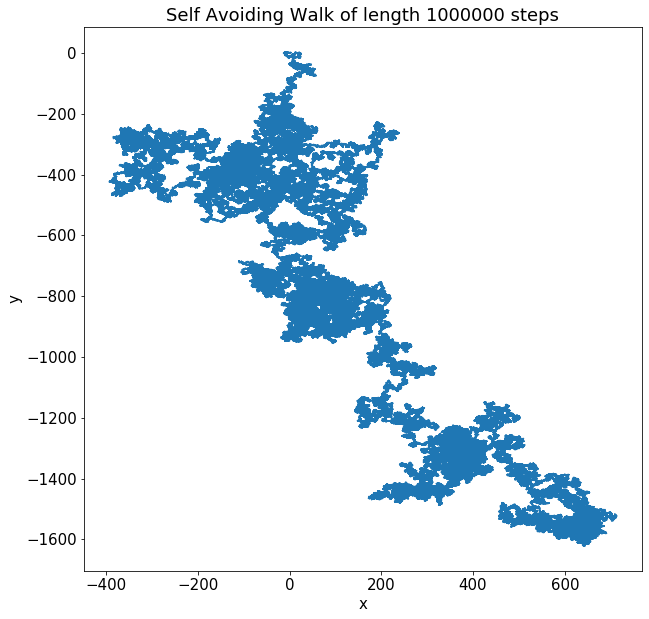

In [41]:
# Just plotting stuff

fig = plt.figure(figsize=(10,10))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Self Avoiding Walk of length "+str(len(path)-1)+ " steps")
plt.plot(path[:,0],path[:,1])


#plt.savefig("Avoid.png")

plt.show()

In [42]:
np.shape(path) # Length of path array - it will be one more than number of steps since (0,0) is added

(1000001, 2)

## Variance of walk - Normal SAW

In [43]:
%%time

# Same as Normal SAW with some modifications to output distance rather than a path 

def carttomark(x,y):
    x = x + int(size/2)
    y = int(size/2) - y
    
    return x,y

def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)
    
    return (x-currentx)**2 + (y-currenty)**2

def take_step(additional_matrix):
    
    gradientmap = np.fromfunction(togetthere,shape=(size,size))
    gradientmap += additional_matrix

    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    return choicesx, choicesy
    
def mainvar():
    # The Same as the normal SAW but as a function so that it can be called repeatidly 
    global currentx
    global currenty
    global size

    marker = np.zeros((11,11))
    size = 11

    currentx = 0
    currenty = 0

    pathx = [0]
    pathy=[0]

    while True: 
    # No path length limit
    
        x_candidates, y_candidates = take_step(marker)

        if len(x_candidates) == 0:
            break
                    
        random_step = np.random.randint(0,len(x_candidates))
        
        currentx = x_candidates[random_step] 
        currenty = y_candidates[random_step]
        
        pathx.append(currentx)
        pathy.append(currenty)
    
        M_x, M_y = carttomark(currentx,currenty)
    
        marker[M_y][M_x] = 100
    
        if currentx + 5 > int(size/2) or currenty + 5 > int(size/2):
            size += 10
            marker = np.pad(marker,5,'edge')
    
    path = np.transpose([pathx,pathy])
    # Makes the path into the prefered form of (2,x) rather than (x,2)
    
    distance = np.sqrt(np.sum(np.square(path),axis = 1))
    # Calculates each position on the path from the origin
    
    return distance

CPU times: user 16 µs, sys: 1e+03 ns, total: 17 µs
Wall time: 23.1 µs


<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 2mins  
</div>

In [44]:
%%time

########################
amount_of_self_avoiding_walks = 10**4 # <<<< Change the amount of SAW considered 
########################

dists_for_var = np.array([mainvar() for i in range(amount_of_self_avoiding_walks)])
# Creates an array of the distances for each of the random walks

#### MAY GIVE YOU WARNING SINCE LENGTH OF DISTANCE ARRAYS DIFFERENT #### 

CPU times: user 1min 34s, sys: 230 ms, total: 1min 35s
Wall time: 1min 35s


In [45]:
top_walks = dists_for_var[np.argsort([len(i) for i in dists_for_var])[int(amount_of_self_avoiding_walks) - 100 ::]] 
# Sorts the length of each SAW and finds the 100 longest - if you use all of them, the shortest will be very short

length_of_walk = [len(i) for i in top_walks]
min_length = np.min(length_of_walk)
# Finds the minimum length out of the 100 longest 

print ('Min length of top 100 walks: '+str(min_length))
equal_length = np.array([i[:min_length]for i in top_walks])
# Makes all the distance arrays the same length so that they can be operated on

var_of_dist_at_each_step = np.var(np.transpose(np.vstack(equal_length)),axis=1)
# Stacks then transposes the distance arrays so that each row is the distance at a given step
# then finds the variance along each row

Min length of top 100 walks: 226


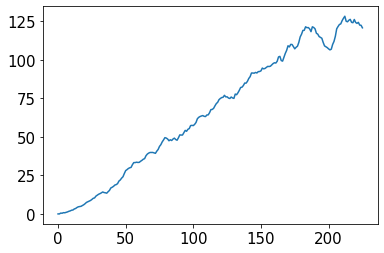

In [46]:
plt.plot(np.arange(0,min_length,1), var_of_dist_at_each_step)
plt.show()

In [47]:
def fitfunc(x,a,b):
    return  a*x**(b)

curve_fit1 = curve_fit(fitfunc, np.arange(0,min_length,1), var_of_dist_at_each_step)
# Fits the data to func - the shape specified in literature

In [48]:
curve_fit1 # reurns the parameters and the errors

(array([0.51779076, 1.02741317]), array([[ 0.00110377, -0.00041702],
        [-0.00041702,  0.0001582 ]]))

## Variance with Backtrack 



<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 7 mins 
</div>

In [69]:

%%time
# Same stuff as above but for SAW with backtrack to see if it makes a difference

amount_of_self_avoiding_walks = 1000


###### Same as above - using %%time it to demonstrate efficiency doesn'y allow the function to be called out side of the cell though
allowed_moves = np.array(([1,0],[0,1],[-1,0],[0,-1]), dtype=int)

def carttomark(x,y):
    x = x + int((size)/2)
    y = int((size)/2) - y
    
    return y, x

def tocart(xmat,ymat):
    return xmat - int((size)/2), -ymat + int((size)/2)
    
def take_step(additional_matrix):
    # Changed philosophy on how the possible positions are calculated
    # Only the 4 possible next steps are checked 
    # Makes it much faster since only 4 positions checked rather than whole array
    # But it can't be used at the edge of an array
    
    possiblepos = currentpos + allowed_moves
    # the possible positions to check
    
    possible_pos_on_matrix = carttomark(possiblepos[:,0],possiblepos[:,1])
    # the possible positions to check changed to matrix indices
    
    possible_pos_on_matrix = np.transpose(np.vstack(possible_pos_on_matrix))
    # changed into (4,2) matrix of possible positions 
    
    available = [additional_matrix[row.astype(int)[0]][row.astype(int)[1]] == 0  for row in possible_pos_on_matrix]
    # Finds if the array equals zero at each possible point
        
    return possiblepos[available]


def main_Backtrack():
# Turned the program into a function so that it can be re-run

    global currentpos
    global size
    
    current_step = 1
    length_avoid = 1000
    marker = np.zeros((11,11),dtype=int)
    size = 11
    
    origin = carttomark(0,0)
    
    marker[origin[0]][origin[1]] = 100
    
    currentpos = [0,0]

    path = np.zeros((length_avoid, 2))
    # path as one array rather than separate x,y arrays
    
    while current_step < length_avoid:

        candidates = take_step(marker)

        if int(np.size(candidates)) == 0:
            
            while int(np.size(candidates)) == 0:
                current_step -= 1 
                # To get to the previous step
                
                currentpos = path[current_step-1]
                # current_step points to the first zero in path, current_step -= 1 takes to last value added to path
                # i.e. the current position so the position before that backtracks by one
                
                candidates = take_step(marker)
        
        random_step = np.random.randint(0,int(np.size(candidates)/2))
        # Needs divide by 2 since np.size() is the amount of number in the array and candidates has 2 coloumns when
        # we only need the amount of rows
        
        currentpos = candidates[random_step] 
        
        path[current_step] = currentpos

        M_y,M_x= carttomark(currentpos[0],currentpos[1])
        
        marker[int(M_y)][int(M_x)] = 100

        if np.abs(currentpos[0]) + 2 > int(size/2) or np.abs(currentpos[1]) + 2 > int(size/2):
            size += 4
            marker = np.pad(marker, 2,'edge')
        
        current_step += 1
    return path

def outputdist():
    
    path = main_Backtrack()
    return np.sqrt(np.sum(np.square(path),axis = 1))


dists_for_var = np.array([outputdist() for i in range(amount_of_self_avoiding_walks)])

CPU times: user 3min 21s, sys: 2.12 s, total: 3min 23s
Wall time: 3min 31s


In [70]:
# Same as for the variance of the normal SAW
top_walks = dists_for_var[np.argsort([len(i) for i in dists_for_var])[int(amount_of_self_avoiding_walks) - 100 ::]]

length_of_walk = [len(i) for i in top_walks]
min_length = np.min(length_of_walk)
print (min_length)

paths = np.array([i[:min_length]for i in top_walks])

distances = np.transpose(np.vstack(paths))
var_of_dist_at_each_step = np.var(distances,axis=1)

1000


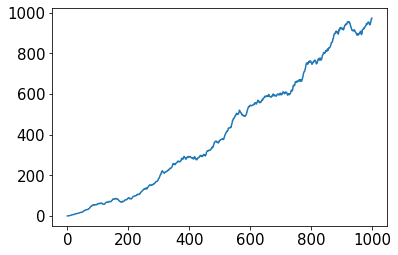

In [51]:
plt.plot(np.arange(0,min_length,1), var_of_dist_at_each_step)

In [52]:
min_length # Since walks that get stuck are filtered out, the min walk is much larger

1000

In [53]:
curve_fit2 = curve_fit(fitfunc, np.arange(0,min_length,1), var_of_dist_at_each_step)

In [54]:
# Fit variable values
curve_fit2

(array([0.07510573, 1.37602045]), array([[ 9.22669875e-06, -1.84696819e-05],
        [-1.84696819e-05,  3.70315143e-05]]))

In [55]:
# Errors in the fitting
perr = np.round(np.sqrt(np.diag(curve_fit1[1])),3)
perr 

array([0.033, 0.013])

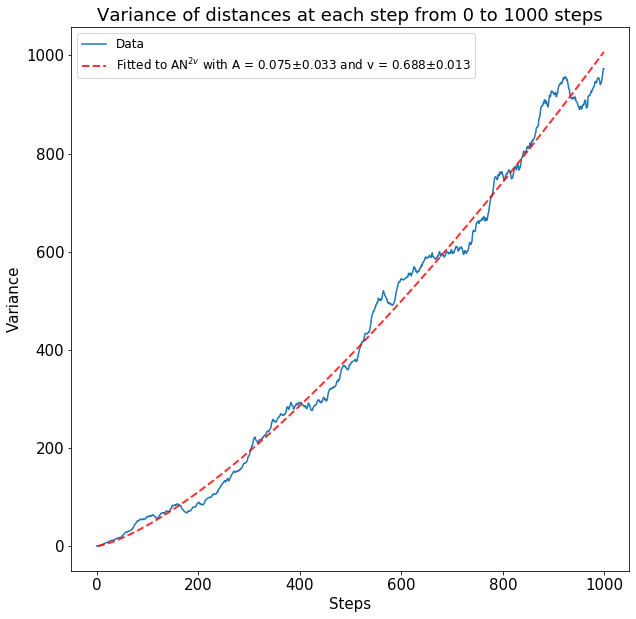

In [56]:
fig = plt.figure(figsize=(10,10))
x = np.arange(2,min_length,1)

fit_line_avoid = curve_fit2[0][0]*x**(curve_fit2[0][1])

scale_for_label = str(np.round(curve_fit2[0][0],3))
exponent_for_label = str(np.round(curve_fit2[0][1]/2,3))
# Getting each variable

error_scale = str(perr[0])
error_exponent = str(perr[1])
# Getting the error in each variable

plt.plot(np.arange(0,min_length,1), var_of_dist_at_each_step,label="Data")
plt.plot(x,fit_line_avoid,alpha=0.8,color='red',linestyle='dashed',
     linewidth=2, label="Fitted to AN$^{2v}$ with A = "+scale_for_label+ "$\pm$" + error_scale + " and v = " + exponent_for_label + "$\pm$" + error_exponent )

plt.xlabel("Steps")
plt.ylabel("Variance")
plt.title("Variance of distances at each step from 0 to "+str(min_length) +" steps")
plt.legend(fontsize=12)
#plt.savefig("SAW_Var.png")
plt.show()

## Distribution of Distance at a particular step

In [57]:
####
Chosen_Step = 15 # <<< Change the distance between steps chosen
####
Chosen_Dist_for_Hist = dist_from_step_Dist(Chosen_Step, distances)

In [58]:
Bins_range = np.linspace(0,100,200)
histOfDist = np.histogram(Chosen_Dist_for_Hist,bins = Bins_range, density = True)

loc1, scale1 = rayleigh.fit(Chosen_Dist_for_Hist)

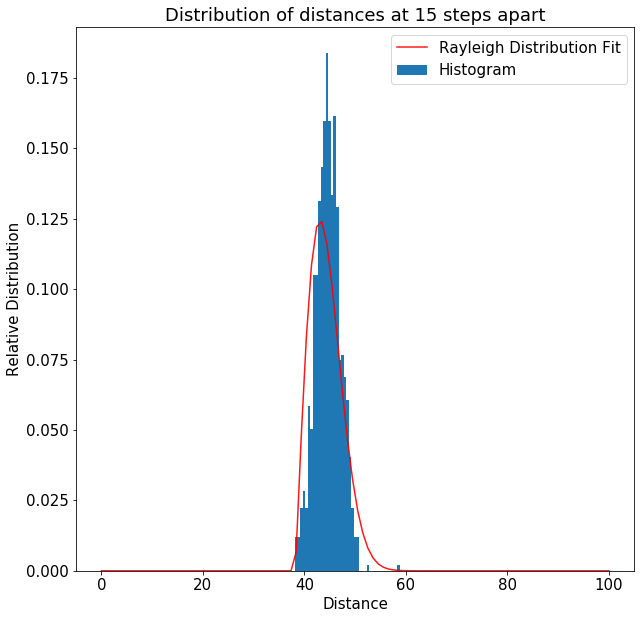

In [59]:
# Just plotting stuff
fig = plt.figure(figsize=(10,10))

# For Rayleight fit
x = np.linspace(0,100,100)
plt.plot(x, rayleigh.pdf(x,scale = scale1,loc = loc1), 'r-', alpha=0.9,label='Rayleigh Distribution Fit')

plt.hist(Chosen_Dist_for_Hist,bins = Bins_range,density = True,label='Histogram')


plt.xlabel("Distance")
plt.ylabel("Relative Distribution")
plt.title("Distribution of distances at "+str(Chosen_Step) +" steps apart")
plt.legend()
#plt.savefig("SAW_Hist.png")
plt.show()

The distribution of distances do not follow a Rayleigh distribution

<a id = "5"></a>
# Self Contained Random Walk - Square

CPU times: user 1.36 s, sys: 7.12 ms, total: 1.37 s
Wall time: 1.37 s


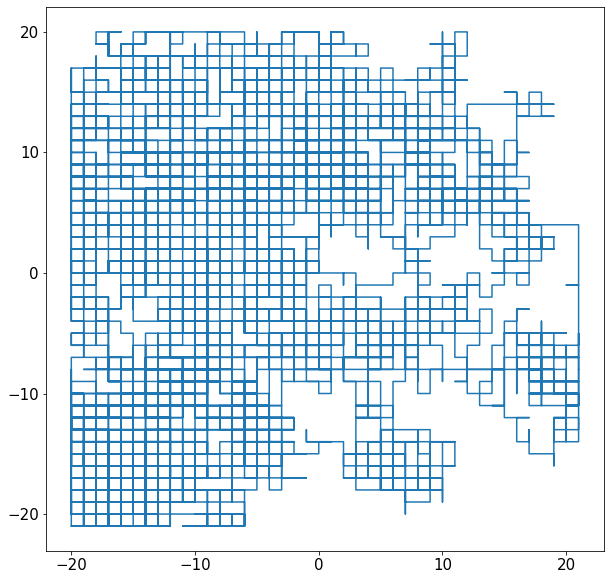

In [60]:
%%time

# Same as SAW with the code that expands the matrix if it reaches the edge

fig = plt.figure(figsize=(10,10))

length = 10000
size = 41



currentx = 0
currenty = 0


pathx = [0]
pathy=[0]


def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)

    return (x-currentx)**2 + (y-currenty)**2

for i in range(length): 
    
    gradientmap = np.fromfunction(togetthere,shape=(size + 1,size + 1))
    
    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    random_step = np.random.randint(0,len(choices[0]))
    
    currentx = choicesx[random_step] 
    currenty = choicesy[random_step]
        
    pathx.append(currentx)
    pathy.append(currenty)

plt.plot(pathx,pathy)

In [61]:
%%time
# Variance of square boundary - same as other variances
path_enclosed = np.transpose([pathx,pathy])

index_array_enclosed = np.reshape(np.arange(0,int((len(path_enclosed)))),(int((len(path_enclosed))),1))

variance_enclosed = np.apply_along_axis(dist_from_step_var, 1, index_array_enclosed, path_enclosed)

CPU times: user 2.06 s, sys: 44.4 ms, total: 2.1 s
Wall time: 2.1 s


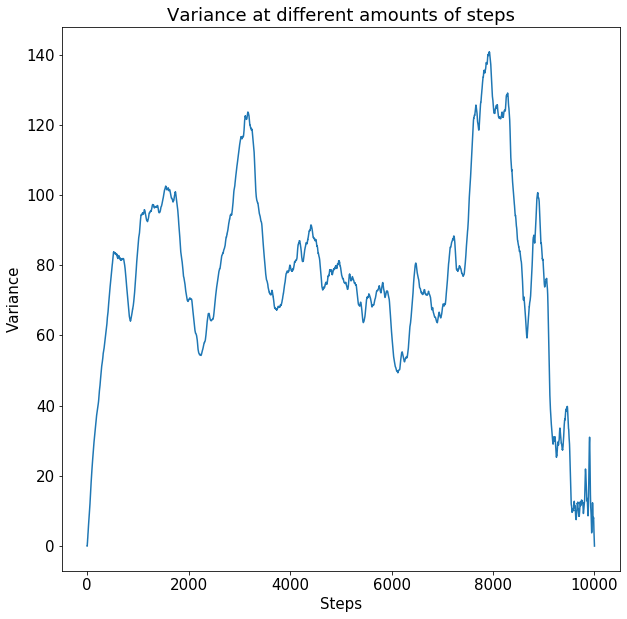

In [62]:
# Just plotting stuff 
fig = plt.figure(figsize=(10,10))
plt.plot(variance_enclosed)

plt.xlabel("Steps")
plt.ylabel("Variance")
plt.title("Variance at different amounts of steps")
plt.savefig("Enclosed_var.png")
plt.show()

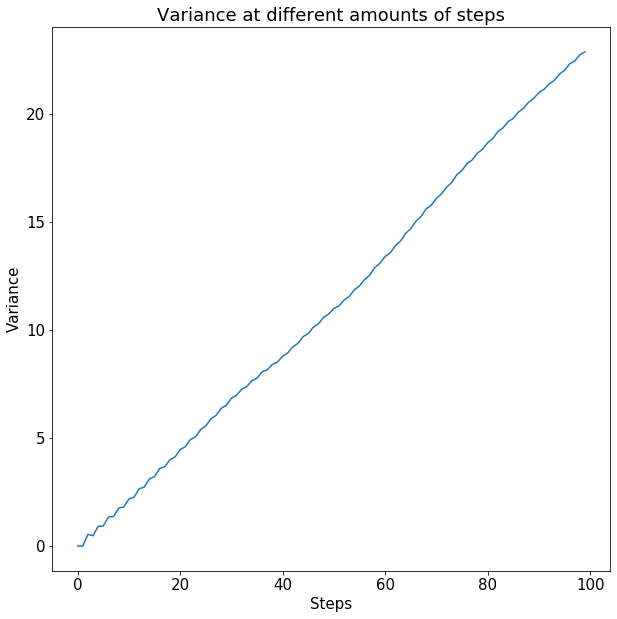

In [63]:
# Just plotting stuff

fig = plt.figure(figsize=(10,10))
plt.plot(variance_enclosed[:int(np.sqrt(length))])

plt.xlabel("Steps")
plt.ylabel("Variance")
plt.title("Variance at different amounts of steps")
#plt.savefig("Enclosed_var.png")
plt.show()

<a id = "6"></a>
# Self Contained Random Walk - Circle

In [64]:
%%time
# Same as SAW but adding a circular boundary as the additional matrix instead of 'marker'

def circle(y,x):
    x,y = tocart(x,y)
    
    # Returns True for all the values outside of the circle and False for values inside
    return x**2 + y**2 > 20**2

#####
length = 10000 # <<< Change the length of the walk
#####
size = 11

currentx = 0
currenty = 0


pathx = [0]
pathy=[0]


def tocart(xmat,ymat):
    return xmat - int(size/2), -ymat + int(size/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)
    return (x-currentx)**2 + (y-currenty)**2

for i in range(length): 
    
    gradientmap = np.fromfunction(togetthere,shape=(size + 1,size + 1))
    
    circle_map =100 * np.fromfunction(circle,shape=(size + 1,size + 1))
    # By multiplying truth array by 100, True = 1, False = 0 so outside the circle = 100 and inside = 0
    # Can be used like the 'marker' array to stop the walker going there
    
    gradientmap += circle_map
    choices = np.where(gradientmap == 1)
    
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    random_step = np.random.randint(0,len(choices[0]))
    
    currentx = choicesx[random_step] 
    currenty = choicesy[random_step]
    
    if currentx + 3 > int(size/2) or currenty + 3 > int(size/2):
        size += 50
        
    pathx.append(currentx)
    pathy.append(currenty)

CPU times: user 2.82 s, sys: 11.8 ms, total: 2.83 s
Wall time: 2.83 s


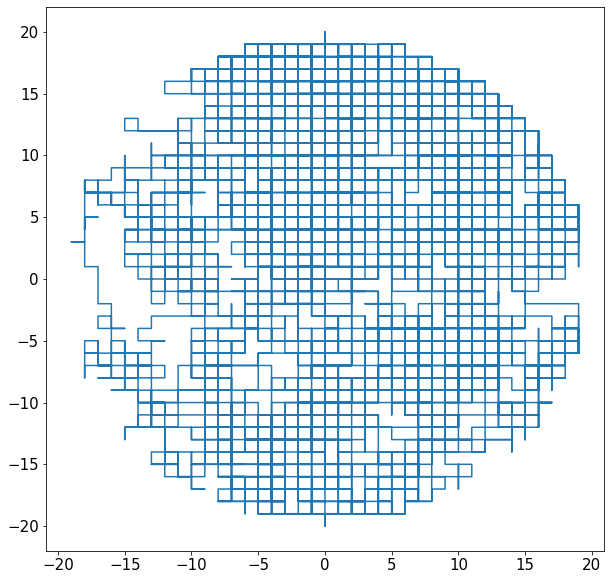

In [65]:
fig = plt.figure(figsize=(10,10))
plt.plot(pathx,pathy)

<a id = "7"></a>
# Random Walk around RANDOM WALK

<div class="alert alert-block alert-danger">
<b>Warning:</b>  ~ 50 secs
</div>

(215, 128)


/Users/mathew3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less


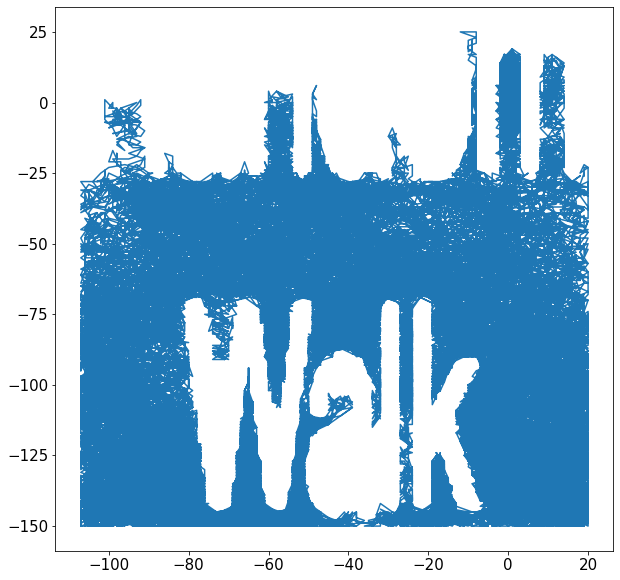

CPU times: user 52.2 s, sys: 15.2 s, total: 1min 7s
Wall time: 1min 8s


In [66]:
%%time
import pandas as pd
# pandas allows shreadsheets to be worked with

df = pd.read_excel("RandomWalk.xlsx")
# gets a streadsheet of an image made using http://think-maths.co.uk/spreadsheet,

word_array = df.to_numpy()
# Turns the dataframe into an array

print(np.shape(word_array))

fig = plt.figure(figsize=(10,10))
######
length = 60000 # <<< Change the length of the walk
######

# Standard random walk program
sizex = int(np.shape(word_array)[0])
sizey = int(np.shape(word_array)[1])

currentx = 0
currenty = 0


pathx = [0]
pathy=[0]


def tocart(xmat,ymat):
    return xmat - int(sizex/2), -ymat + int(sizey/2)
    
def togetthere(y,x):
    x,y = tocart(x,y)

    return (x-currentx)**2 + (y-currenty)**2

for i in range(length): 
    
    gradientmap = np.fromfunction(togetthere,shape=(sizex ,sizey))
    gradientmap += word_array
    
    #plt.imshow(gradientmap)
    #plt.show()
    choices = np.where(gradientmap < 25)
    # By setting gradientmap < 25 rather than == 1, any position within a circle of radius 5 is a potential 
    # position for the next move - to speed up propogation around the words 
    # A normal random walk or self avoiding walk could be used but it would take more time and this is just a 
    # proof of concept
    choicesx, choicesy = tocart(choices[1],choices[0])
    
    random_step = np.random.randint(0,len(choicesx))
    
    currentx = choicesx[random_step] 
    currenty = choicesy[random_step]
    
    pathx.append(currentx)
    pathy.append(currenty)

plt.plot(pathx,pathy)
plt.show()